In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
import math
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency 
import statsmodels.api as sm
from scipy.stats import fisher_exact

Here, I will help out with univariate analysis, starting with some of the simpler data to work with and 

In [2]:
df = pd.read_csv("clean.csv")
df.head(n=10)

,Timestamp,id,major_status,taken_courses,grad_semester,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,...,ranking_10,ranking_11,ranking_12,ranking_13,ranking_14,desired_amount_of_courses,percieved_amount_of_courses_needed,ranking_15,ranking_16,ranking
0,10/29/2023 18:04:33,0,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","310-1, ROBOTICS",...,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,"303-1, DATABASE SYSTEMS,428-1, GENERATIVE DATA..."
1,10/30/2023 14:54:36,1,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 205...",Spring 2025,"304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","315-1, COMPUTER NETWORKS","214-1, WEB TECH (TBD)","496-1, RESEARCH SEMINAR",...,NaN,NaN,NaN,NaN,NaN,4,3,NaN,NaN,"304-1, ALGORITHMS,302-1, OBJECT-ORIENTED SOFTW..."
2,10/31/2023 13:53:58,2,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"313-1, ALGORITHMIC GAME THEORY","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","214-1, WEB TECH","303-1, DATABASE SYSTEMS","315-1, COMPUTER NETWORKS",...,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,"313-1, ALGORITHMIC GAME THEORY,302-1, OBJECT-O..."
3,11/1/2023 12:36:27,3,intended CS major,COM 110 CC:INTRO COMP SCI & PROB SOLV,Spring 2027,"212-2, DATA STRUCTURES","212-1, DATA STRUCTURES",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,"212-2, DATA STRUCTURES,212-1, DATA STRUCTURES,..."
4,10/23/2023 14:02:40,4,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2025,"219-1, COMPUTER ORGANIZATION","304-1, ALGORITHMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN","303-1, DATABASE SYSTEMS","310-1, ROBOTICS",...,"496-2, RESEARCH SEMINAR","214-1, WEB TECH (TBD)",NaN,NaN,NaN,3,3,NaN,NaN,"219-1, COMPUTER ORGANIZATION,304-1, ALGORITHMS..."
5,10/23/2023 14:19:58,5,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2025,"302-1, OBJECT-ORIENTED SOFTWARE DESIGN","219-1, COMPUTER ORGANIZATION",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,"302-1, OBJECT-ORIENTED SOFTWARE DESIGN,219-1, ..."
6,10/23/2023 14:38:45,6,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 212...",Spring 2024,"214-1, WEB TECH (TBD)","496-1, RESEARCH SEMINAR","496-2, RESEARCH SEMINAR","310-1, ROBOTICS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN",...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,"214-1, WEB TECH (TBD),496-1, RESEARCH SEMINAR,..."
7,10/23/2023 15:05:15,7,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Fall 2024,"304-1, ALGORITHMS","219-1, COMPUTER ORGANIZATION","315-1, COMPUTER NETWORKS","496-1, RESEARCH SEMINAR",NaN,...,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,"304-1, ALGORITHMS,219-1, COMPUTER ORGANIZATION..."
8,11/1/2023 20:27:43,8,declared CS major,"COM 212 DATA STRUCTURES, COM 219 COMPUTER ORGA...",Spring 2026,"304-1, ALGORITHMS","496-2, RESEARCH SEMINAR","315-1, COMPUTER NETWORKS","303-1, DATABASE SYSTEMS","302-1, OBJECT-ORIENTED SOFTWARE DESIGN",...,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,"304-1, ALGORITHMS,496-2, RESEARCH SEMINAR,315-..."
9,11/1/2023 14:20:03,9,declared CS major,"COM 110 CC:INTRO COMP SCI & PROB SOLV, COM 211...",Spring 2024,"315-1, COMPUTER NETWORKS","496-1, RESEARCH SEMINAR","303-1, DATABASE SYSTEMS","428-1, GENERATIVE DATA MODELING",NaN,...,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,"315-1, COMPUTER NETWORKS,496-1, RESEARCH SEMIN..."


In [3]:
gradsemcounts = df.grad_semester.value_counts()
gradsemcounts

Spring 2026    41
Spring 2025    33
Spring 2024    33
Spring 2027    16
Fall 2027       5
Fall 2024       4
Fall 2025       1
Name: grad_semester, dtype: int64

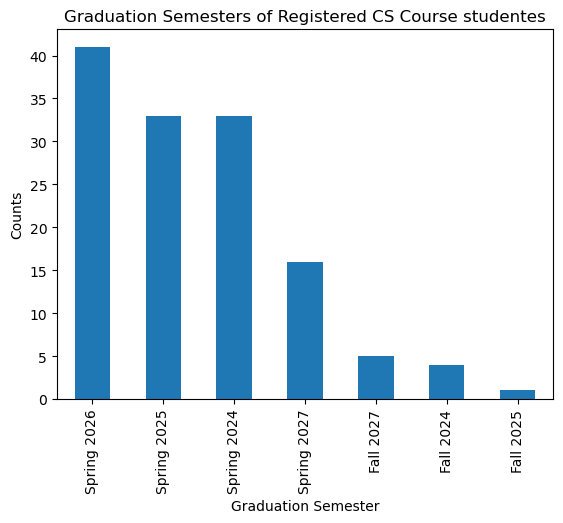

In [4]:
gradsemcounts.plot(kind='bar')
plt.title("Graduation Semesters of Registered CS Course studentes")
plt.xlabel("Graduation Semester")
plt.ylabel("Counts")
plt.show()

In [5]:
df.grad_semester.describe()

count             133
unique              7
top       Spring 2026
freq               41
Name: grad_semester, dtype: object

In [6]:
majorstatuscounts = df.major_status.value_counts()
majorstatuscounts

declared CS major    82
intended CS major    34
CS minor             16
none of the above     1
Name: major_status, dtype: int64

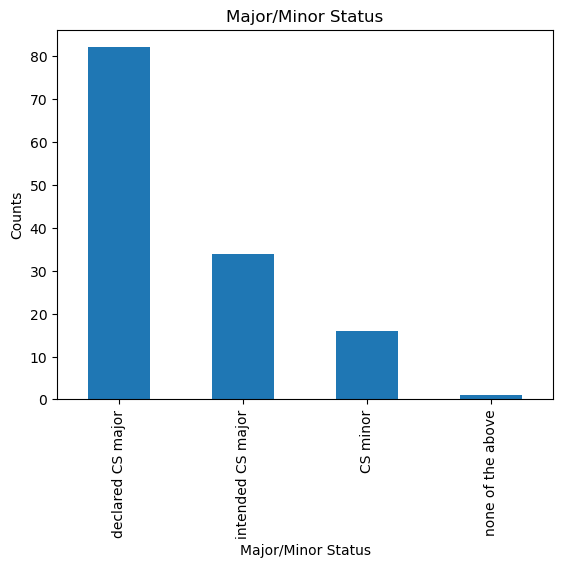

In [7]:
majorstatuscounts.plot(kind='bar')
plt.title("Major/Minor Status")
plt.xlabel("Major/Minor Status")
plt.ylabel("Counts")
plt.show()

In [8]:
df.major_status.describe()

count                   133
unique                    4
top       declared CS major
freq                     82
Name: major_status, dtype: object

In [9]:
topchoicecounts = df.ranking_1.value_counts()
topchoicecounts

304-1, ALGORITHMS                         22
219-1, COMPUTER ORGANIZATION              20
315-1, COMPUTER NETWORKS                  19
212-1, DATA STRUCTURES                    19
302-1, OBJECT-ORIENTED SOFTWARE DESIGN    12
310-1, ROBOTICS                            9
303-1, DATABASE SYSTEMS                    8
496-2, RESEARCH SEMINAR                    7
212-2, DATA STRUCTURES                     5
313-1, ALGORITHMIC GAME THEORY             4
428-1, GENERATIVE DATA MODELING            4
214-1, WEB TECH                            2
214-1, WEB TECH (TBD)                      1
Name: ranking_1, dtype: int64

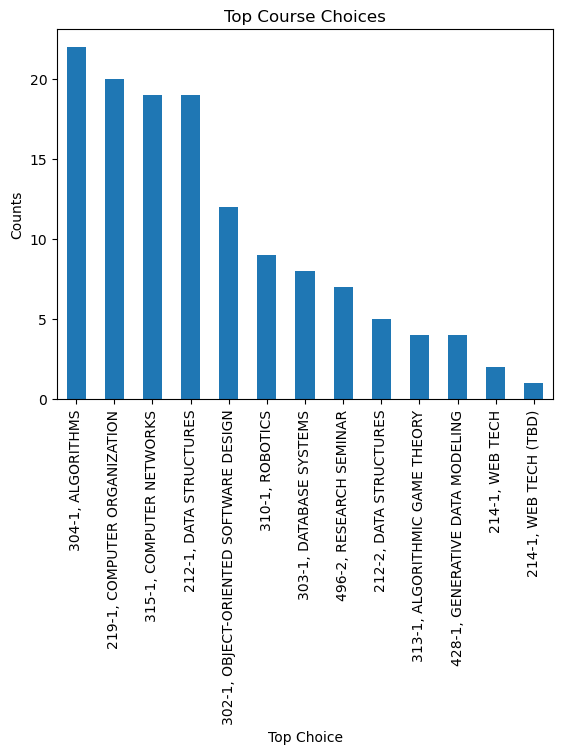

In [10]:
topchoicecounts.plot(kind='bar')
plt.title("Top Course Choices")
plt.xlabel("Top Choice")
plt.ylabel("Counts")
plt.show()

In [12]:
desiredcoursescounts = df['desired_amount_of_courses'].value_counts()
desiredcoursescounts

2    56
1    34
3    33
4     9
5     1
Name: desired_amount_of_courses, dtype: int64

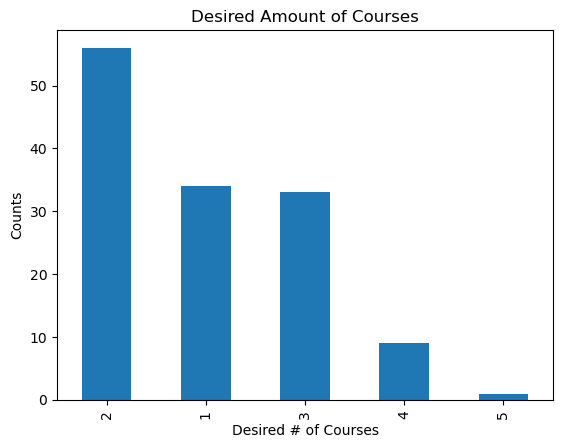

In [13]:
desiredcoursescounts.plot(kind='bar')
plt.title('Desired Amount of Courses')
plt.xlabel('Desired # of Courses')
plt.ylabel('Counts')
plt.show()